In [1]:
import tensorflow as tf
import numpy as np
import copy
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from livelossplot import PlotLossesKerasTF

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)

import datasets
import losses
import models
from build import build, train

In [2]:
base, trainable, preprocess_input = models.ResNetRB3()

In [3]:
dataset, n = datasets.SCUTFBP5500(input_shape=base.input_shape)
#dataset, n = datasets.MEBeauty(input_shape=base.input_shape)
dataset.generate(model=base, preprocess_input=preprocess_input, augment=0)

69/69 [==============================] - 2s 26ms/step
(3300, 14, 14, 1024) (2200, 14, 14, 1024)
(3300, 5) (2200, 5)


In [4]:
mlp = [
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
    ]

model = build(
    base.output_shape,
    #base=base,
    trainable=trainable,
    n=n,
    mlp=mlp,
    augment=False,
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 1, 1, 2048)        14987264  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization_1 (Batc  (None, 128)             

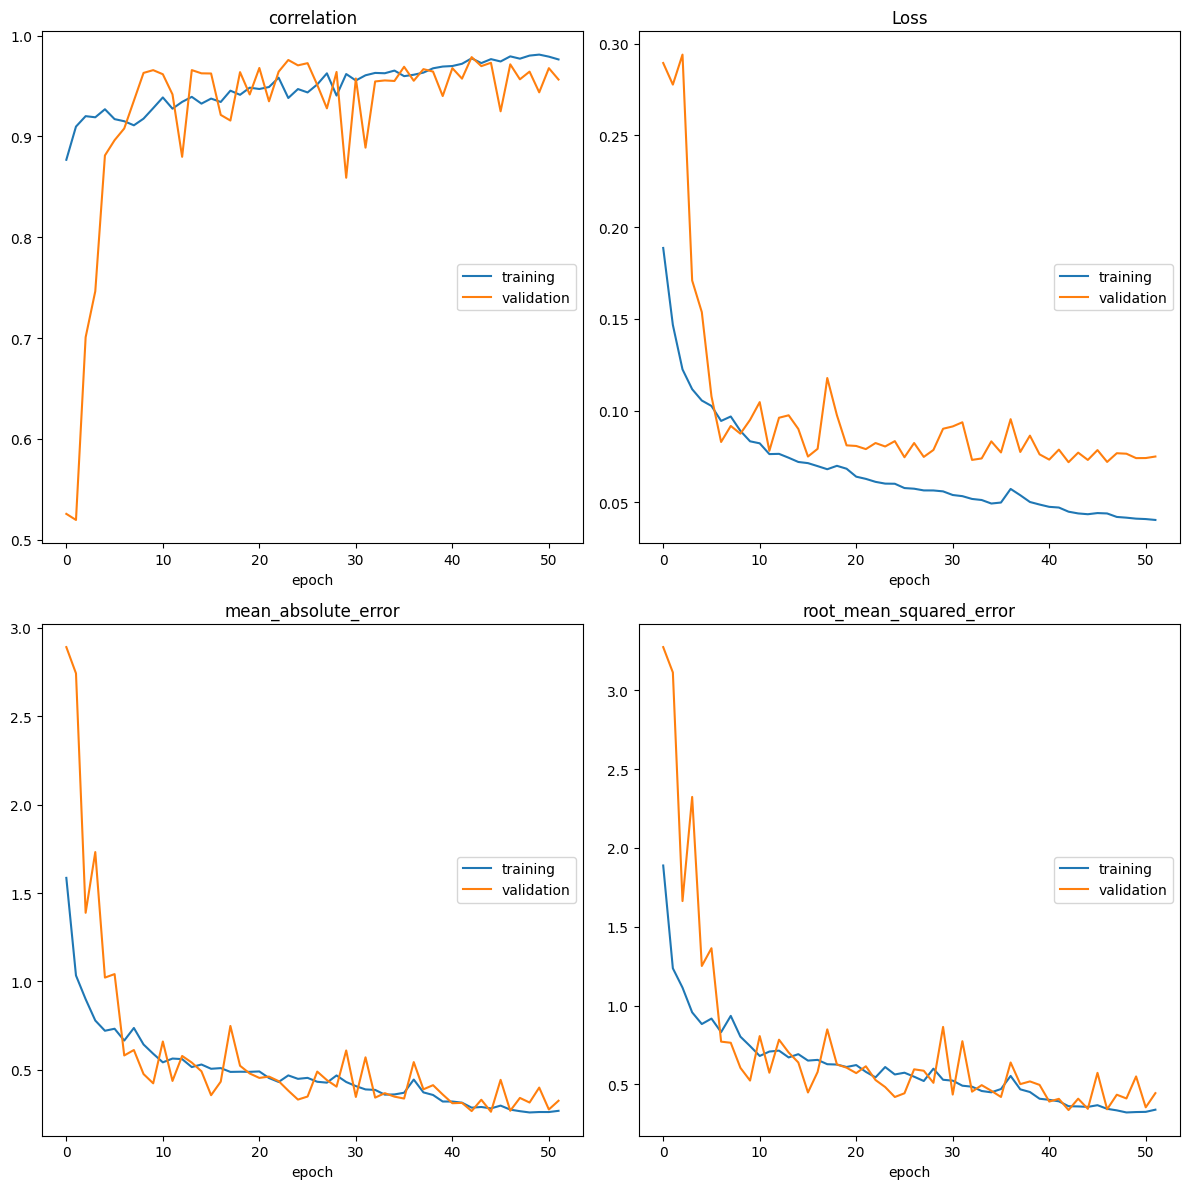

correlation
	training         	 (min:    0.877, max:    0.981, cur:    0.976)
	validation       	 (min:    0.520, max:    0.979, cur:    0.956)
Loss
	training         	 (min:    0.040, max:    0.189, cur:    0.040)
	validation       	 (min:    0.072, max:    0.294, cur:    0.075)
mean_absolute_error
	training         	 (min:    0.260, max:    1.586, cur:    0.269)
	validation       	 (min:    0.264, max:    2.890, cur:    0.326)
root_mean_squared_error
	training         	 (min:    0.322, max:    1.888, cur:    0.339)
	validation       	 (min:    0.337, max:    3.274, cur:    0.444)
104/104 [==============================] - 6s 57ms/step - loss: 0.0405 - mean_absolute_error: 0.2689 - root_mean_squared_error: 0.3391 - correlation: 0.9764 - val_loss: 0.0750 - val_mean_absolute_error: 0.3258 - val_root_mean_squared_error: 0.4441 - val_correlation: 0.9564


In [5]:
#loss = tf.keras.losses.MeanSquaredError()
#loss = tf.keras.losses.CategoricalCrossentropy()
loss = losses.SquaredEarthMoversDistance()
metrics = [losses.MeanAbsoluteErrorSD(n=n), losses.RootMeanSquaredErrorSD(n=n), losses.PearsonCorrelationSD(n=n)]

train(model, loss, dataset.train, dataset.test, metrics)

In [7]:
model.evaluate(dataset.test)

69/69 [==============================] - 1s 8ms/step - loss: 0.2777 - mean_absolute_error: 2.7414 - root_mean_squared_error: 3.1132 - correlation: 0.5196


[0.2777281701564789, 2.741405487060547, 3.1132469177246094, 0.5196499228477478]